In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [160]:
cols = ['rp_over_rstar', 'rhostar', 'b', 'Pp', 'tau', 'q1', 'q2', 'Ps', 
       'asp/p', 'phi_s', 'cos(is)', '0s', 'Msp', 'Rsp', 
        'q1TESS', 'q2TESS', 'B_TESS', 'loglike']


post_labels = [
    r'$R_P/R_*$', 
    r'$\rho_*$', 
    r'$b$', 
    r'$P_P$', 
    r'$\tau$', 
    r'$q_{1, \textit{Kepler}}$', 
    r'$q_{2, \textit{Kepler}}$', 
    r'$P_S$', 
    r'$a_{SP}/R_P$', 
    r'$\phi_{s}$', 
    r'$\cos(i_s)$', 
    r'$\Omega_S$', 
    r'$M_S/M_P$', 
    r'$R_S/R_P$', 
    r'$q_{1, TESS}$', 
    r'$q_{2, TESS}$', 
    r'$\mathcal{B}_\textrm{TESS}$', 
    'loglike']
posterior = pd.read_csv('LRVmoon-post_equal_weights.dat', sep='\s+', names=cols)



posterior

rp_over_rstar      rhostar         b          Pp         tau        q1  \
0           0.079029  1272.333907  0.176584  160.884347  277.505989  0.478267   
1           0.078962  1322.801605  0.073605  160.884416  277.505939  0.417800   
2           0.078591  1323.470814  0.025203  160.884403  277.505593  0.478534   
3           0.079109  1230.160130  0.224910  160.884263  277.506600  0.435813   
4           0.078502  1309.124736  0.065323  160.884219  277.507098  0.460810   
...              ...          ...       ...         ...         ...       ...   
30926       0.078436  1306.134325  0.050286  160.884375  277.506381  0.535178   
30927       0.078299  1302.428645  0.055070  160.884361  277.506295  0.535596   
30928       0.078299  1302.428645  0.055070  160.884361  277.506295  0.535596   
30929       0.078322  1311.063725  0.032048  160.884338  277.506298  0.512844   
30930       0.078322  1311.063725  0.032048  160.884338  277.506298  0.512844   

             q2         Ps      asp/p     phi_s   cos(is)        0s       Msp  \
0      0.286638  61.527310  30.416531  1.188574 -0.059770  0.132736  0.009799   
1      0.327558  36.622281  41.349445  0.246072  1.092150  2.066523  0.006891   
2      0.323936  47.416032  75.851783  0.043094  0.966248  2.547969  0.003984   
3      0.333667  21.125677  20.604160  5.407376  1.668207  0.274901  0.015792   
4      0.330324  25.194601  13.662678  0.533178  2.695445  1.554914  0.025591   
...         ...        ...        ...       ...       ...       ...       ...   
30926  0.273448  36.661393  59.723882  5.406297  2.712481 -3.054314  0.005729   
30927  0.285814  36.656234  75.058803  5.529036  2.844369 -2.939861  0.005578   
30928  0.285814  36.656234  75.058803  5.529036  2.844369 -2.939861  0.005578   
30929  0.297186  67.281975  62.242301  5.454192  2.672064 -3.026134  0.005553   
30930  0.297186  67.281975  62.242301  5.454192  2.672064 -3.026134  0.005553   

            Rsp    q1TESS    q2TESS    B_TESS       loglike  
0      0.052433  0.497239  0.176579  1.137081  33708.395353  
1      0.087342  0.130223  0.927511  1.156572  33709.093942  
2      0.138370  0.225604  0.389642  1.144101  33709.636425  
3      0.083243  0.277260  0.282268  1.098901  33709.899215  
4      0.061743  0.106429  0.158143  1.130216  33710.238602  
...         ...       ...       ...       ...           ...  
30926  0.113704  0.249294  0.100379  1.037258  33729.374442  
30927  0.119478  0.037010  0.069477  1.023609  33728.449959  
30928  0.119478  0.037010  0.069477  1.023609  33728.449959  
30929  0.117811  0.086345  0.104698  1.012769  33728.737782  
30930  0.117811  0.086345  0.104698  1.012769  33728.737782  

[30931 rows x 18 columns]

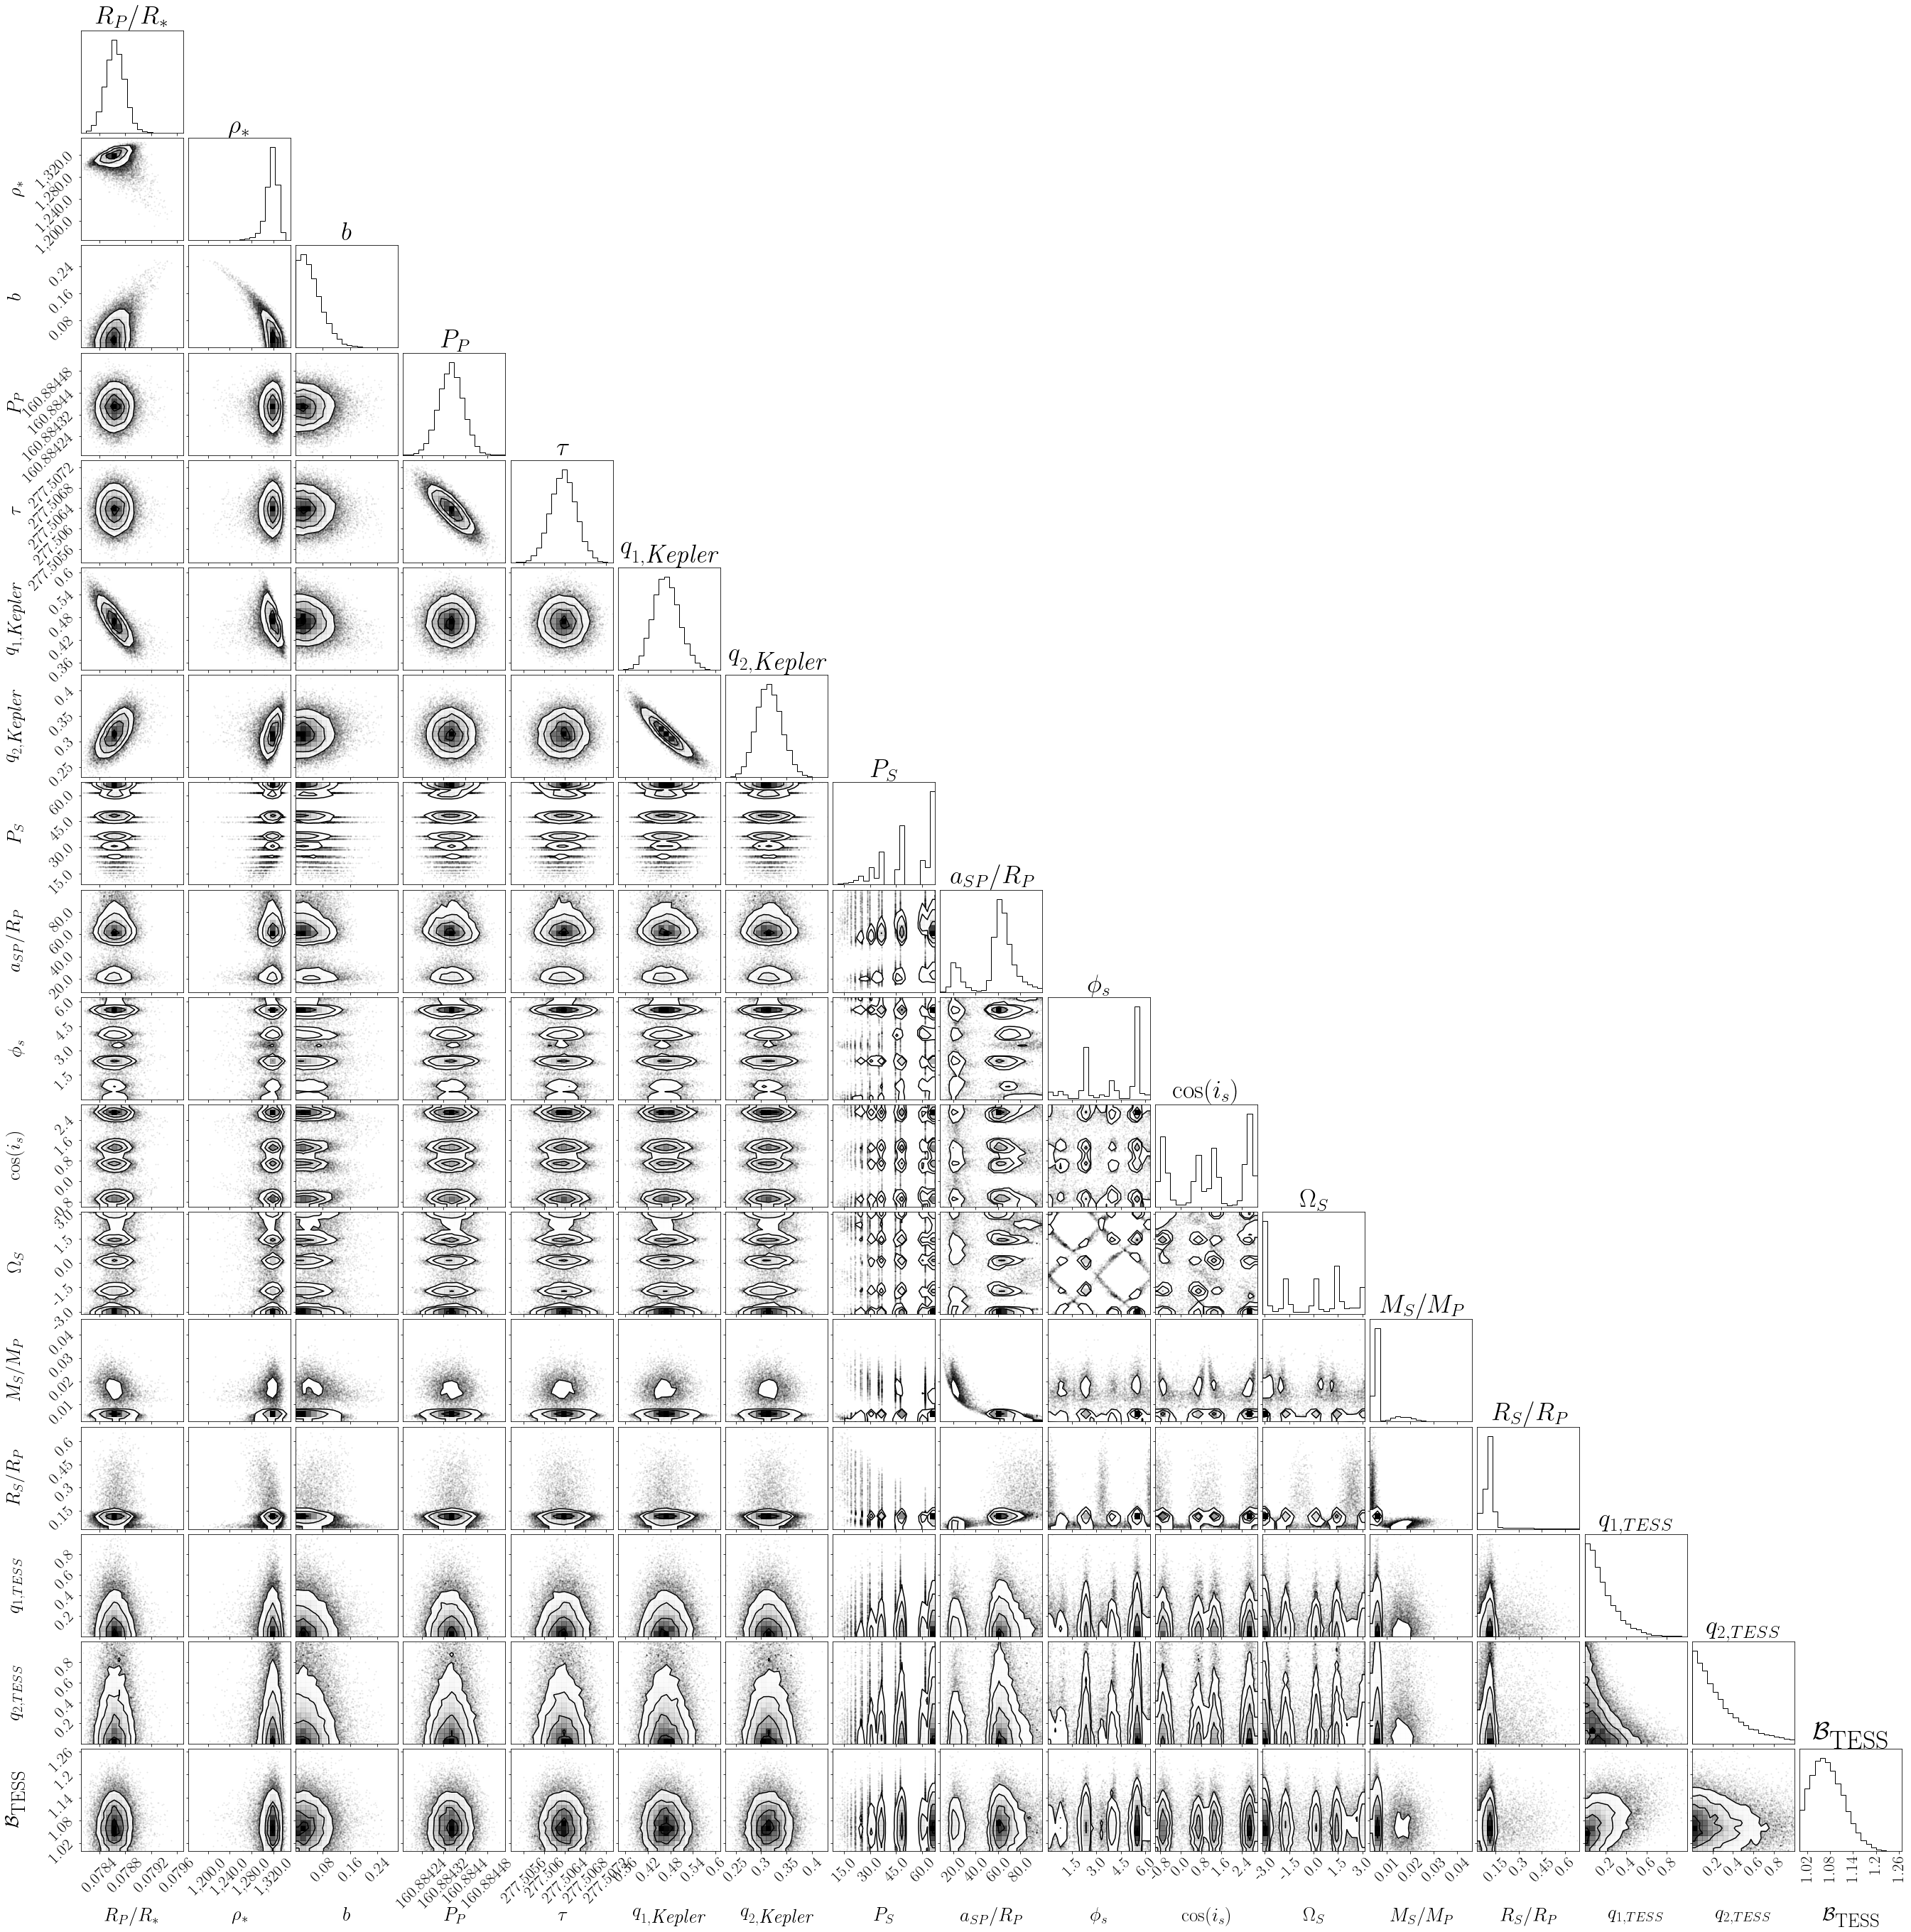

In [161]:
import corner 
import matplotlib.pyplot as plt


post_corner = posterior.iloc[:, :-1]

fig = corner.corner(post_corner, labels = post_labels[:-1], show_titles=True, title_kwargs={'fontsize': 36},
                    label_kwargs={'fontsize': 27}, labelpad=0.25, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError

#this just cleans up labels, removing annoying scientific notation offset
count = 0
for ax in fig.get_axes():
    if count % 17 == 0:
        ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))

    
    if count > len(fig.get_axes())-17:
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))
    count+=1

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('LUNA_corner.pdf', bbox_inches='tight')
plt.show()

In [162]:
# Find the index of the row with the highest 'loglike' value
index_of_max = posterior['loglike'].idxmax()

# Select the row with the highest 'loglike' value
row_with_max_loglike = posterior.loc[index_of_max]

print(row_with_max_loglike)



rp_over_rstar        0.078592
rhostar           1320.780337
b                    0.017635
Pp                 160.884355
tau                277.506347
q1                   0.476966
q2                   0.311525
Ps                  67.366132
asp/p               62.748365
phi_s                5.463660
cos(is)              1.409472
0s                  -3.087918
Msp                  0.005398
Rsp                  0.115694
q1TESS               0.187894
q2TESS               0.102393
B_TESS               1.067909
loglike          33731.935449
Name: 29562, dtype: float64


In [163]:
condition1 = posterior['Ps'] > 66
condition2 = posterior['Ps'] < 69
condition3 = posterior['cos(is)'] > 1.2
condition4 = posterior['cos(is)'] < 1.6
condition5 = posterior['phi_s'] > 4
condition6 = posterior['0s'] < 0


posterior_final_mode1 = posterior.loc[(condition1) & 
                                      (condition2) & 
                                      (condition3) & 
                                      (condition4) & 
                                      (condition5) &
                                      (condition6)]


print(len(posterior))
print(len(posterior_final_mode1))


30931
877


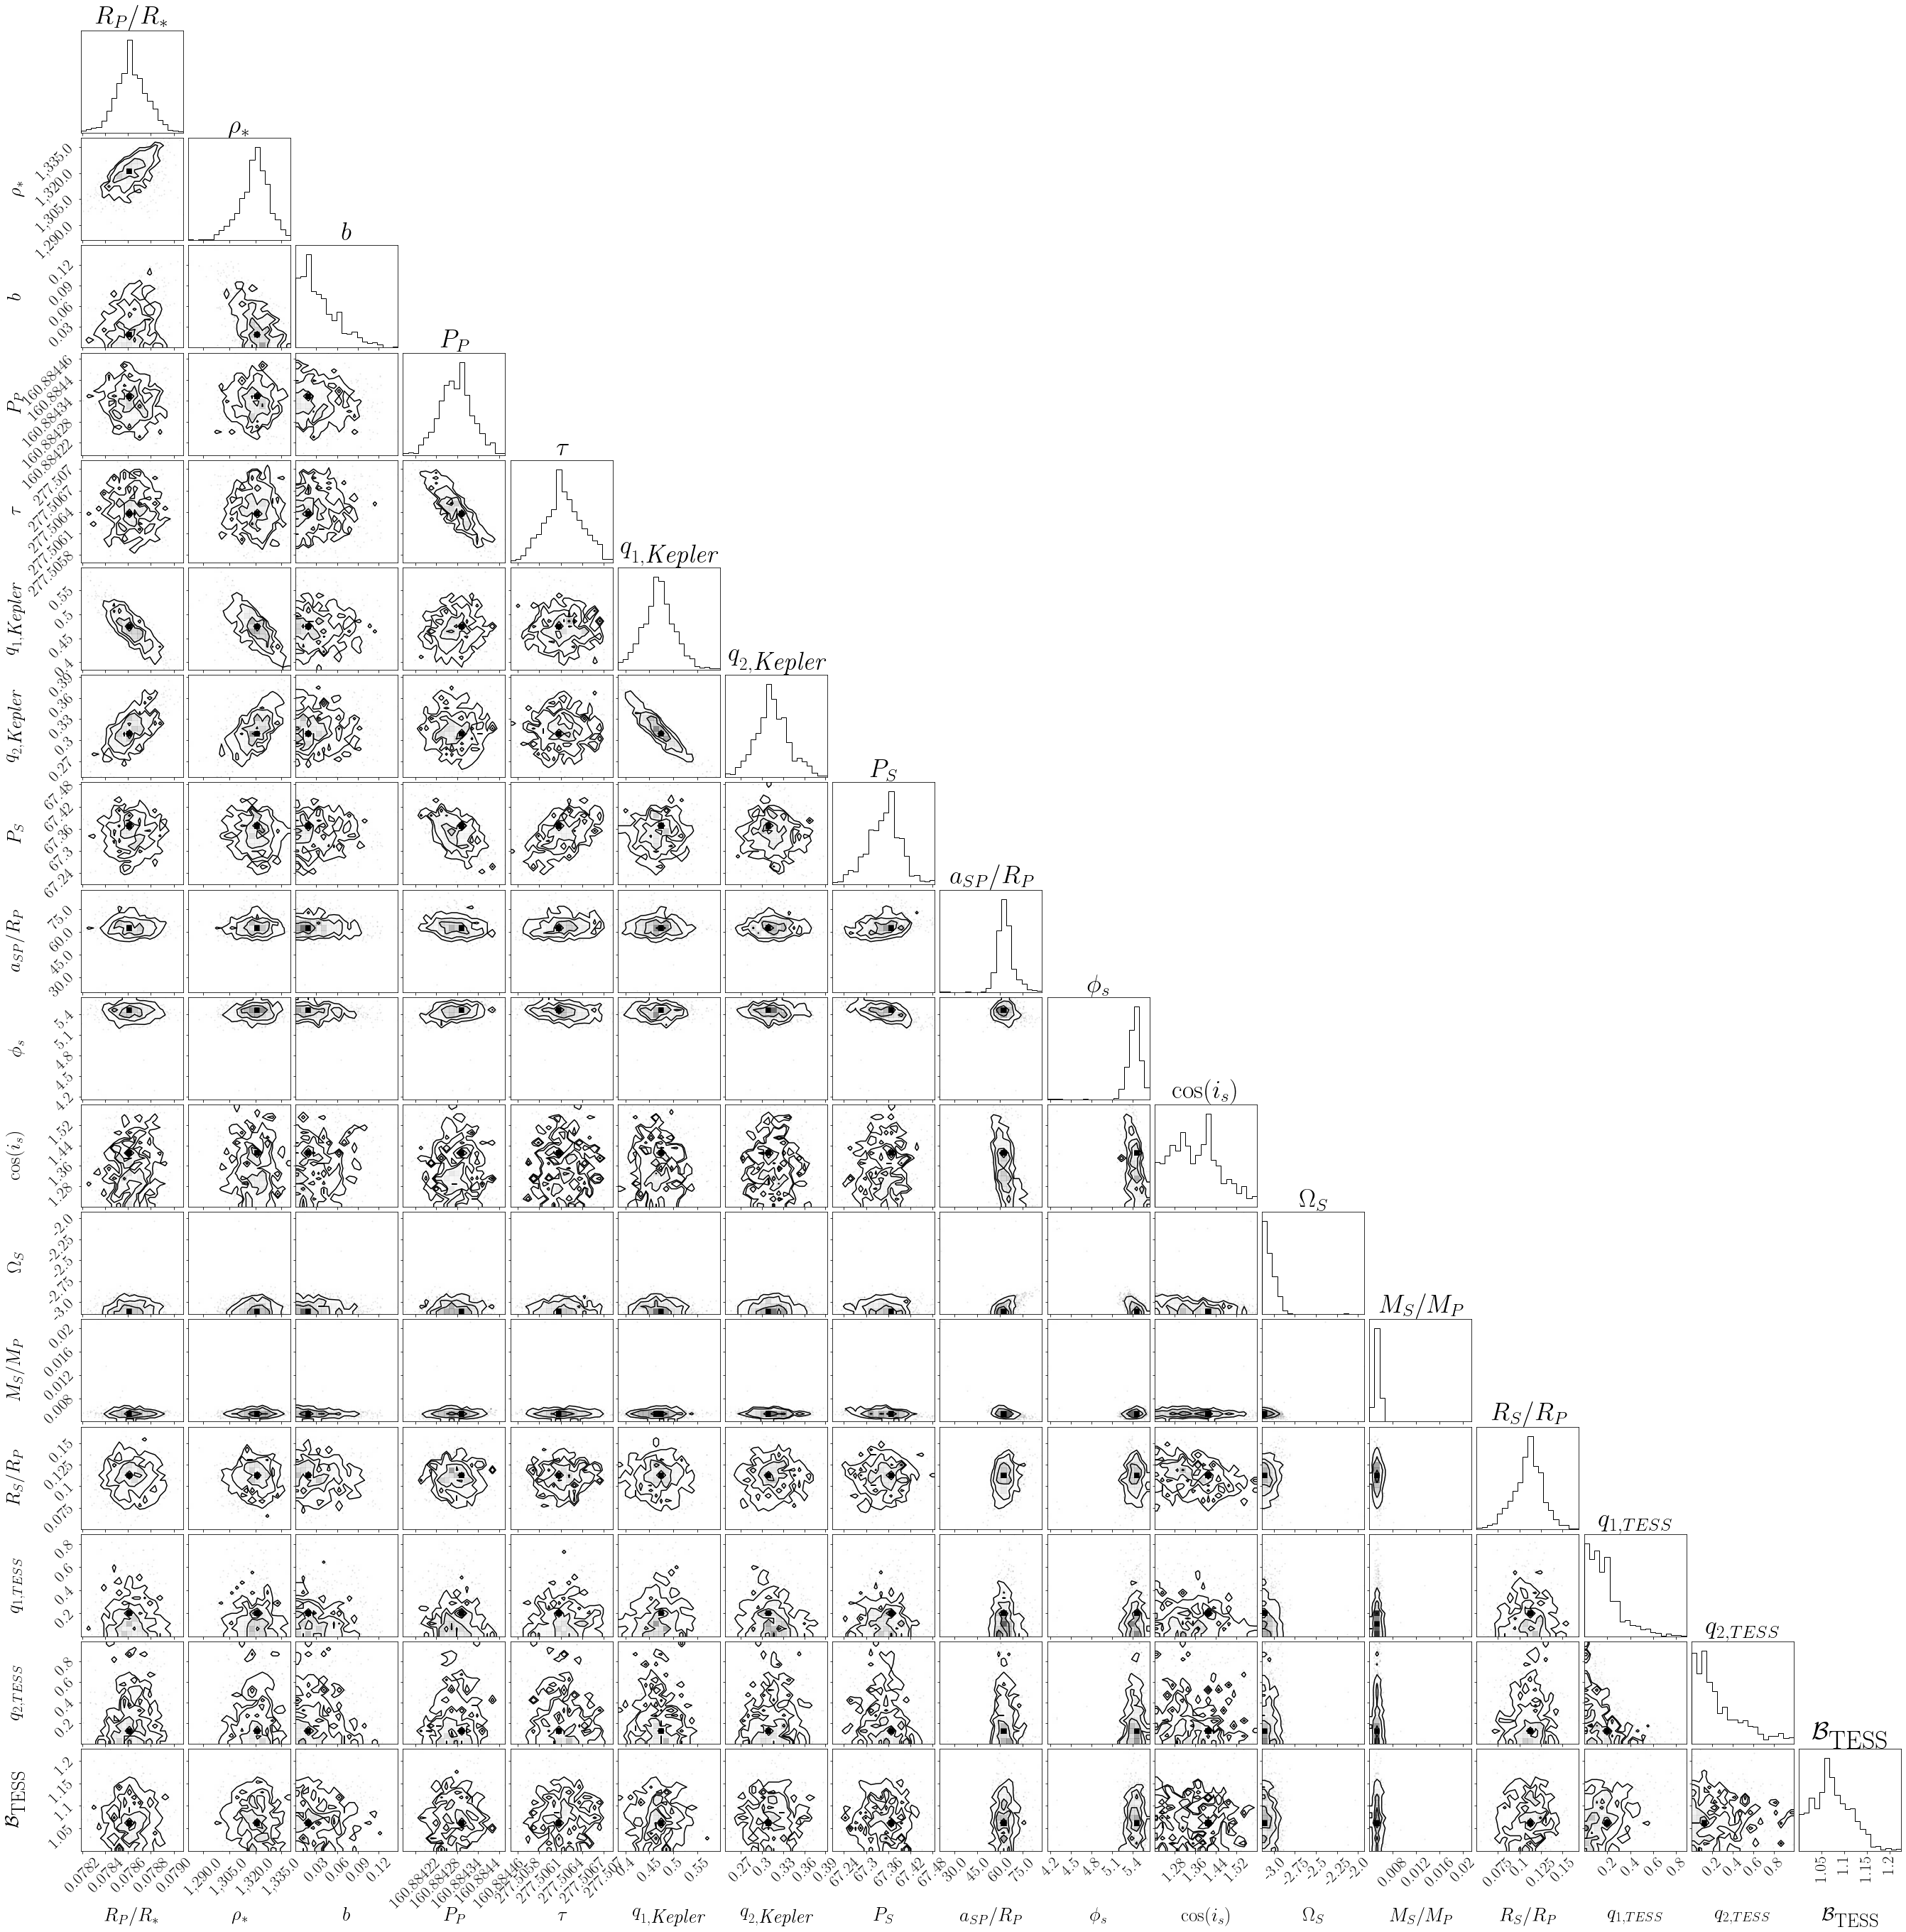

In [164]:
import corner 
import matplotlib.pyplot as plt


post_corner = posterior_final_mode1.iloc[:, :-1]

fig = corner.corner(post_corner, labels = post_labels[:-1], show_titles=True, title_kwargs={'fontsize': 36},
                    label_kwargs={'fontsize': 27}, labelpad=0.25, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError

#this just cleans up labels, removing annoying scientific notation offset
count = 0
for ax in fig.get_axes():
    if count % 17 == 0:
        ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))

    
    if count > len(fig.get_axes())-17:
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))
    count+=1

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('LUNA_corner_1mode.pdf', bbox_inches='tight')
plt.show()
